# [Notebook 03] Activation Functions

So far, our notion of neural networks is entirely linear, the output of our network is directly proportional to every variable (excluding the bias terms). If you recall our formulation of an unactivated neuron, no matter how many inputs it has, its output can be expressed as a sum of:

1. Variables multiplied by coefficients

2. Constants

__This would still be true if we created a 1,000,000 layer deep neural net.__

I'll demonstrate this with the calculation of a shallow network with 3 dense layers and no activation function. I won't get into the specifics of Dense layers in this notebook, that will come in the next one, but all you need to know for now is that the calculation is commonly expressed as the dot product (element-wise multiplication) of the input layer and the weights of the dense layer, added to a bias term.

So let's say we have an input of size 2:
$$ \text{input} = \begin{bmatrix} x_1 & x_2 \end{bmatrix} $$

Followed by a dense layer with 4 weights (2 inputs for 2 nodes) and outputs 2 values.

$$ \text{dense1} = \begin{bmatrix} w^1_{11} & w^1_{12} \\\\ w^1_{21} & w^1_{22} \end{bmatrix} $$

Followed by a dense layer with 4 weights (2 inputs for 2 nodes) and outputs 2 values.

$$ \text{dense2} = \begin{bmatrix} w^2_{11} & w^2_{12} \\\\ w^2_{21} & w^2_{22} \end{bmatrix} $$

Followed by an output layer with 2 weights (2 inputs for 1 nodes) and outputs 1 value.

$$ \text{output} = \begin{bmatrix} y_1 \\\\ y_2 \end{bmatrix} $$

__Calculating the output__ - for every layer, we'll multiply the input value by the weihgts of the layer, and add a bias term.

__dense1__

$$ 
\begin{equation}
\begin{aligned}
\text{dense1 output} &= \begin{bmatrix} x_1 & x_2 \end{bmatrix} \cdot \begin{bmatrix} w^2_{11} & w^2_{12} \\\\ w^2_{21} & w^2_{22}\end{bmatrix} + \begin{bmatrix} b^2_1 & b^2_2\end{bmatrix}\\
&= \begin{bmatrix} x_1 * w^1_{11} + x_2 * w^1_{12} + b^1_1 &  x_1 * w^1_{21} + x_2 * w^1_{22} + b^1_2  \end{bmatrix}
\end{aligned}
\end{equation}
$$

__dense2__ - this is getting long so lets remove the $*$ sign and transpose the matrix to save space

$$ 
\begin{equation}
\begin{aligned}
\text{dense2 output} &= \begin{bmatrix} x_1  w^1_{11} + x_2  w^1_{12} + b^1_1 &  x_1  w^1_{21} + x_2  w^1_{22} + b^1_2 \end{bmatrix} \cdot \begin{bmatrix} w^1_{11} & w^1_{12} \\\\ w^1_{21} & w^1_{22}\end{bmatrix}  + \begin{bmatrix} b^2_1 & b^2_2
\end{bmatrix} \\
&= \begin{bmatrix} (x_1 w^1_{11} + x_2 w^1_{12} + b^1_1) w^2_{11} + (x_1 w^1_{21} + x_2 w^1_{22} + b^1_2) w^2_{12} + b^2_1 \\\\  (x_1 w^1_{11} + x_2 w^1_{12} + b^1_1) w^2_{21} + (x_1 w^1_{21} + x_2 w^1_{22} + b^1_2) w^2_{22} + b^2_2 
\end{bmatrix}^T \\
&= \begin{bmatrix}
x_1 (w^1_{11}w^2_{11} + w^1_{21}w^2_{12}) + x_2 (w^1_{12}w^2_{11} + w^1_{22}w^2_{12}) + b^1_1w^2_{11} + b^1_2w^2_{12} + b^2_1 \\\\
x_1 (w^1_{11}w^2_{21} + w^1_{21}w^2_{22}) + x_2 (w^1_{12}w^2_{21} + w^1_{22}w^2_{22}) + b^1_1w^2_{21} + b^1_2w^2_{22} + b^2_2
\end{bmatrix}^T
\end{aligned}
\end{equation}
$$

__output__ - I hope I didn't make a typo somewhere, but if I did, you probably couldn't tell
$$
\begin{equation}
\begin{aligned}
\text{final output} &=\begin{bmatrix}
x_1 (w^1_{11}w^2_{11} + w^1_{21}w^2_{12}) + x_2 (w^1_{12}w^2_{11} + w^1_{22}w^2_{12}) + b^1_1w^2_{11} + b^1_2w^2_{12}+ b^2_1  \\\\ 
x_1 (w^1_{11}w^2_{21} + w^1_{21}w^2_{22}) + x_2 (w^1_{12}w^2_{21} + w^1_{22}w^2_{22}) + b^1_1w^2_{21} + b^1_2w^2_{22} + b^2_2 \end{bmatrix}^T
\cdot \begin{bmatrix} y_{1} \\\\ y_{2} \end{bmatrix}  + \begin{bmatrix} b_y \end{bmatrix} \\
&= 
x_1 (w^1_{11}w^2_{11}y_{1} + w^1_{21}w^2_{12}y_{1} + w^1_{11}w^2_{21}y_{2} + w^1_{21}w^2_{22}y_{2}) + 
x_2 (w^1_{12}w^2_{11}y_{1} + w^1_{22}w^2_{12}y_{1} + w^1_{12}w^2_{21}y_{2} + w^1_{22}w^2_{22}y_{2}) + b^1_1(w^2_{11}y_{1} + w^2_{21}y_{2}) + 
b^1_2(w^2_{12}y_{1} + w^2_{22}y_{2}) + 
b^2_1y_{1} + b^2_2y_{2} + b_y 
\end{aligned}
\end{equation}
$$

This is a pain to look at and looks complicated but remember that all the weight $w$ and bias $b$ terms are constants. This means that our calculation actually boils down to:

$$ x_1 * \text{constant} + x_2  * \text{constant} + \text{constant}
$$

__So no matter how many layers we add, we get something that could've been expressed as a network with no hidden layers and 1 output node.__

# The Solution? Activation Functions

See how all the weights and biases of different layers were "collapsed" together to form constants in the previous function? Activation functions are basically an intermediate step between each layer that prevents weights and biases from different layers from getting grouped together and reduced to a single number.

There's typically two ways to introduce non-linearity:
 - include a non-linear operation (like exponentiation)
 - use an "if-else"
 - use both above options (eg. ELU)

I won't write out a calculation because the terms won't simplify and we would get a truly incomprehensible mess, but that's the point - with activation functions, __our complex looking function is actually complex__. Adding more layers actually makes the network more __\~expressive\~__.

KaiTorch implements six activation functions:
- `sigmoid`
- `tanh`
- `ReLU`
- `LeakyReLU`
- `ELU`
- `swish`

### Sigmoid

$$
\begin{equation}
\begin{aligned}
\text{sigmoid}(x) &= \frac{1}{1 + e^{-x}} \\
\text{sigmoid}'(x) &= \text{sigmoid}(x) * (1 - \text{sigmoid}(x))
\end{aligned}
\end{equation}
$$

In [1]:
# kaitorch/functional.py

def sigmoid(x):
    '''
    Calculation: y = 1 / (1 + (e ** -x))
    '''
    if x < 0:
        out = math.exp(x) / (1 + math.exp(x))
    else:
        out = 1 / (1 + math.exp(-x))
    return out


def d_sigmoid(x):
    '''
    Derivative: dy/dx = sigmoid(x) * (1 - sigmoid(x))
    Chain Rule: dL/dx = dL/dy * dy/dx
                      = dL/dy * (sigmoid(x) * (1 - sigmoid(x)))
    '''
    out = sigmoid(x) * (1 - sigmoid(x))
    return out

### Tanh

$$
\begin{equation}
\begin{aligned}
\text{tanh}(x) &= \frac{e ^ {2x} - 1}{e ^ {2x} + 1} \\
\text{tanh}'(x) &= 1 - \text{tanh}(x) ^2
\end{aligned}
\end{equation}
$$

In [2]:
# kaitorch/functional.py

def tanh(x):
    '''
    Calculation: y = (e ** (2 * x) - 1) / (e ** (2 * x) + 1)
    '''
    out = (math.exp(2 * x) - 1) / (math.exp(2 * x) + 1)
    return out


def d_tanh(x):
    '''
    Derivative: dy/dx = (1 - (tanh(x) ** 2))
    Chain Rule: dL/dx = dL/dy * dy/dx
                      = dL/dy * (1 - (tanh(x) ** 2))
    '''
    out = (1 - (tanh(x) ** 2))
    return out

### ReLU (Rectified Linear Unit)

$$
\begin{equation}
\begin{aligned}
\text{ReLU}(x) &= 
\begin{cases}
x & \text{if } x \geq 0\\
0 & \text{if } x \lt 0\\
\end{cases} \\
\text{ReLU}'(x) &= 
\begin{cases}
1 & \text{if } x \geq 0\\
0 & \text{if } x \lt 0\\
\end{cases}
\end{aligned}
\end{equation}
$$

In [3]:
# kaitorch/functional.py

def ReLU(x):
    '''
    Calculation: y = x if x ≥ 0
                     0 if x < 0
    '''
    out = 0 if x < 0 else x
    return out


def d_ReLU(x):
    '''
    Derivative: dy/dx = 1 if x ≥ 0
                        0 if x < 0
    Chain Rule: dL/dx = dL/dy * dy/dx
                      = dL/dy * 1 if x ≥ 0
                        dL/dy * 0 if x < 0
    '''
    out = (x > 0) * 1
    return out

### LeakyReLU (Rectified Linear Unit)

$$
\begin{equation}
\begin{aligned}
\text{LeakyReLU}(x, α) &= 
\begin{cases}
x & \text{if } x \geq 0\\
x * α & \text{if } x \lt 0\\
\end{cases} \\
\text{LeakyReLU}'(x, α) &= 
\begin{cases}
1 & \text{if } x \geq 0\\
α & \text{if } x \lt 0\\
\end{cases}
\end{aligned}
\end{equation}
$$

In [4]:
# kaitorch/functional.py

def LeakyReLU(x, alpha=0.1):
    '''
    Calculation: y = x if x ≥ 0
                     x * α if x < 0
    '''
    out = x * alpha if x < 0 else x
    return out


def d_LeakyReLU(x, alpha=0.1):
    '''
    Derivative: dy/dx = 1 if x ≥ 0
                        α if x < 0
    Chain Rule: dL/dx = dL/dy * dy/dx
                      = dL/dy * 1 if x ≥ 0
                        dL/dy * α if x < 0
    '''
    out = alpha if x < 0 else 1
    return out

### ELU (Exponential Linear Unit)

$$
\begin{equation}
\begin{aligned}
\text{ELU}(x, α) &= 
\begin{cases}
x & \text{if } x \geq 0\\
α \cdot (e^x - 1) & \text{if } x \lt 0\\
\end{cases} \\
\text{ELU}'(x) &= 
\begin{cases}
1 & \text{if } x \geq 0\\
α \cdot e^x & \text{if } x \lt 0\\
\end{cases}
\end{aligned}
\end{equation}
$$

In [5]:
# kaitorch/functional.py

def ELU(x, alpha=1.0):

    '''
    Calculation: y = x if x ≥ 0
                     α * ((e ** x) - 1) if x < 0
    '''
    out = alpha * (math.exp(x) - 1) if x < 0 else x
    return out


def d_ELU(x, alpha=1.0):
    '''
    Derivative: dy/dx = 1 if x ≥ 0
                        α * (e ** x) if x < 0
    Chain Rule: dL/dx = dL/dy * dy/dx
                      = dL/dy * 1 if x ≥ 0
                        dL/dy * α * (e ** x) if x < 0
    '''
    out = (alpha * math.exp(x)) if x < 0 else 1
    return out

### Swish

$$
\begin{equation}
\begin{aligned}
\text{swish}(x, β) &= x \cdot \text{sigmoid}(x \cdot β) \\
\text{swish}'(x, β) &= \text{swish}(x, β) + \text{sigmoid}(x \cdot β) \cdot (1 - \text{swish}(x, β))
\end{aligned}
\end{equation}
$$

In [6]:
# kaitorch/functional.py

def swish(x, beta=1.0):
    '''
    Calculation: y = x * sigmoid(β * x)
    '''
    out = x * sigmoid(x * beta)
    return out


def d_swish(x, beta=1.0):
    '''
    Derivative: dy/dx = swish(x, β) + sigmoid(β * x) * (1 - swish(x, β))
    Chain Rule: dL/dx = dL/dy * dy/dx
                      = dL/dy * swish(x, β) + sigmoid(β * x) * (1 - swish(x, β))
    '''

    out = swish(x, beta) + sigmoid(beta * x) * (1 - swish(x, beta))
    return out

To top off `functional.py`, which contains the calculations and derivatives for each activation function, we'll include this at the top of the module.

In [7]:
# kaitorch/functional.py 

import math
import kaitorch.activations as A

activations = A.__all__
derivatives = [f'd_{activation}' for activation in activations]

__all__ = [x for y in zip(activations, derivatives) for x in y]

# Activations Module

Now that we have the calculation & derivatives for each activation function, let's create an `activations.py` module with a `class` for each activation, which just like how we defined our base operations, we implement the `_forward()` and `_backward()` methods. 

The reason we use a class instead of a function is because unlike our base operations, some activation functions take hyperparameters like `α` and `β` which we want to keep track of when we first instantiate the activation function.

In [8]:
# kaitorch/activations.py

__all__ = ['sigmoid', 'tanh', 'ReLU', 'LeakyReLU', 'ELU', 'swish', 'softmax']

import warnings

import kaitorch.functional as F
from kaitorch.core import Scalar


class Activation:
    pass


class sigmoid(Activation):

    def __init__(self):
        pass

    def __repr__(self):
        return 'sigmoid'

    def __call__(self, scalar):

        def _forward():
            y = F.sigmoid(scalar.data)
            return Scalar(y, (scalar, ), 'sigmoid')
        out = _forward()

        def _backward():
            scalar.grad += F.d_sigmoid(out.data) * out.grad
        out._backward = _backward

        return out


class tanh(Activation):

    def __init__(self):
        pass

    def __repr__(self):
        return 'tanh'

    def __call__(self, scalar):

        def _forward():
            y = F.tanh(scalar.data)
            return Scalar(y, (scalar, ), 'tanh')
        out = _forward()

        def _backward():
            scalar.grad += F.d_tanh(out.data) * out.grad
        out._backward = _backward

        return out


class swish(Activation):

    def __init__(self, beta=None):

        self.beta = beta
        if beta is None:
            self.beta = 1
            warnings.warn('Parameter {beta} not specified, using default value 1')

    def __repr__(self):
        return f'swish(β={self.beta})'

    def __call__(self, scalar):

        def _forward():
            y = F.swish(scalar.data, self.beta)
            return Scalar(y, (scalar, ), 'swish')
        out = _forward()

        def _backward():
            scalar.grad += F.d_swish(out.data, self.beta) * out.grad
        out._backward = _backward

        return out


class ReLU(Activation):

    def __init__(self):
        pass

    def __repr__(self):
        return 'ReLU'

    def __call__(self, scalar):

        def _forward():
            y = F.ReLU(scalar.data)
            return Scalar(y, (scalar, ), 'ReLU')
        out = _forward()

        def _backward():
            scalar.grad += F.d_ReLU(out.data) * out.grad
        out._backward = _backward

        return out


class LeakyReLU(Activation):

    def __init__(self, alpha=None):

        self.alpha = alpha
        if alpha is None:
            self.alpha = 0.01
            warnings.warn('Parameter {alpha} not specified, using default value 0.01')

    def __repr__(self):
        return f'LeakyReLU(α={self.alpha})'

    def __call__(self, scalar):

        def _forward():
            y = F.LeakyReLU(scalar.data, self.alpha)
            return Scalar(y, (scalar, ), 'LeakyReLU')
        out = _forward()

        def _backward():
            scalar.grad += F.d_LeakyReLU(out.data, self.alpha) * out.grad
        out._backward = _backward

        return out


class ELU(Activation):

    def __init__(self, alpha=None):

        self.alpha = alpha
        if alpha is None:
            self.alpha = 0.01
            warnings.warn('Parameter {alpha} not specified, using default value 0.01')

    def __repr__(self):
        return f'ELU(α={self.alpha})'

    def __call__(self, scalar):

        def _forward():
            y = F.ELU(scalar.data, self.alpha)
            return Scalar(y, (scalar, ), 'ELU')
        out = _forward()

        def _backward():
            scalar.grad += F.d_ELU(out.data, self.alpha) * out.grad
        out._backward = _backward

        return out
    
def softmax(ins: list):

    exps = [n.exp() for n in ins]
    sums = sum([n.data for n in exps])
    outs = [n/sums for n in exps]

    return outs


You might be wondering why I didn't mention softmax earlier and why it's defined differently.

Since we're building a neural network that operates over scalar values (which is very inefficient but useful for understanding how neural nets work), and the 6 activation functions we defined above operate on scalar values, it aligns well with what we're building.

However, softmax operates over an __array input__, and how softmax activates each neuron depends on the other values in the layer. This what it does:

1. natural exponentiation of every element in the array

2. normalization so all terms sum to 1

Even though softmax doesn't fit the theme of KaiTorch, I still wanted to implement since its commonly used as the final activation for multiclass classification.

# Visualizing the Activation Functions

In [9]:
import kaitorch.activations as A
import kaitorch.functional as F

import numpy as np
import matplotlib.pyplot as plt

A.__all__.remove('softmax')

In [10]:
list(A.__all__)

['sigmoid', 'tanh', 'ReLU', 'LeakyReLU', 'ELU', 'swish']

In [11]:
list(F.__all__)

['sigmoid',
 'd_sigmoid',
 'tanh',
 'd_tanh',
 'ReLU',
 'd_ReLU',
 'LeakyReLU',
 'd_LeakyReLU',
 'ELU',
 'd_ELU',
 'swish',
 'd_swish',
 'softmax',
 'd_softmax']

In [12]:
def plot_activation(activation):
    
    xs = np.arange(-6, 6, 0.1) 
    zeros = np.zeros(len(xs))

    activ = getattr(F, activation)
    deriv = getattr(F, f'd_{activation}')
    
    activs = [activ(x) for x in xs]
    derivs = [deriv(x) for x in xs]
    
    minim = min(min(activs), min(derivs))
    maxim = max(max(activs), max(derivs))
        
    fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
    fig.suptitle(activation, fontsize=16, weight='bold')

    axes[0].plot(xs, activs, color='blue')
    axes[0].plot(xs, zeros, color='black', linestyle='dashed')
    axes[0].set_title('Activation Function')

    axes[1].plot(xs, activs, color='blue')
    axes[1].plot(xs, derivs, color='green')
    axes[1].plot(xs, zeros, color='black', linestyle='dashed')
    axes[1].set_title('Overlay')

    axes[2].plot(xs, derivs, color='green')
    axes[2].plot(xs, zeros, color='black', linestyle='dashed')
    axes[2].set_title('Derivative')
    
    plt.xlim(-6, 6)
    plt.ylim(minim - 0.1, maxim + 0.1)
    plt.tight_layout()
    plt.show()

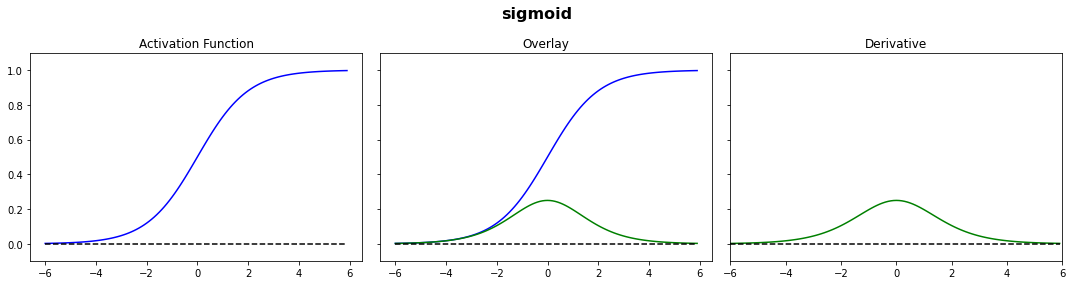

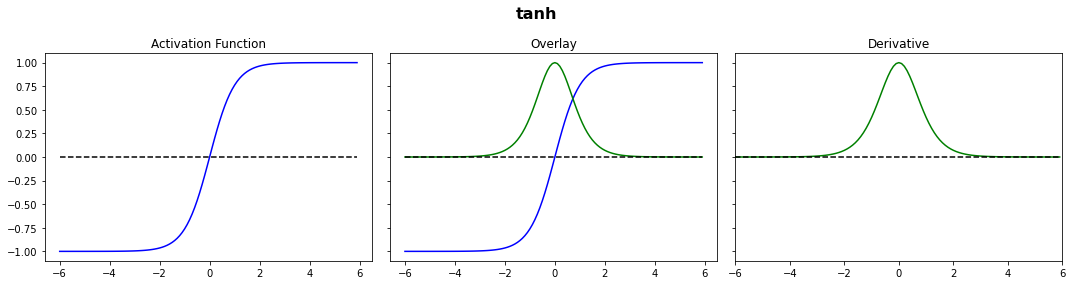

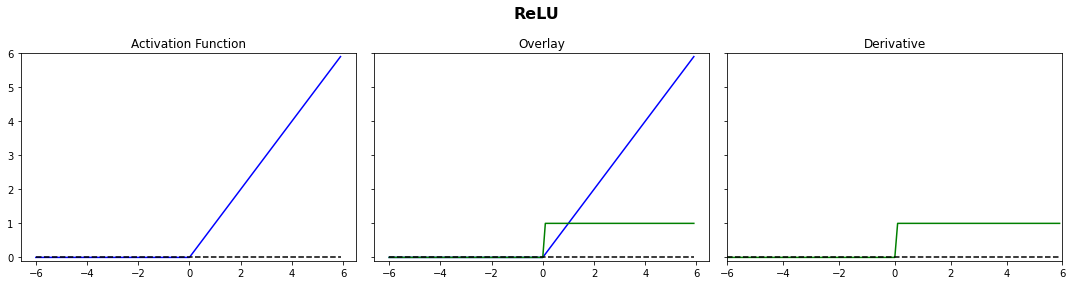

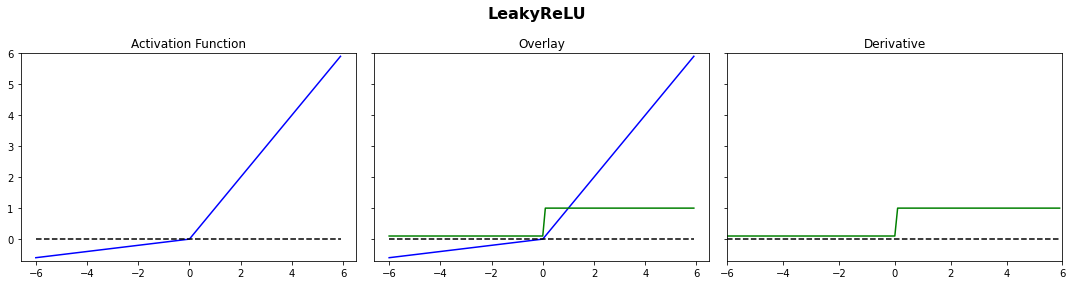

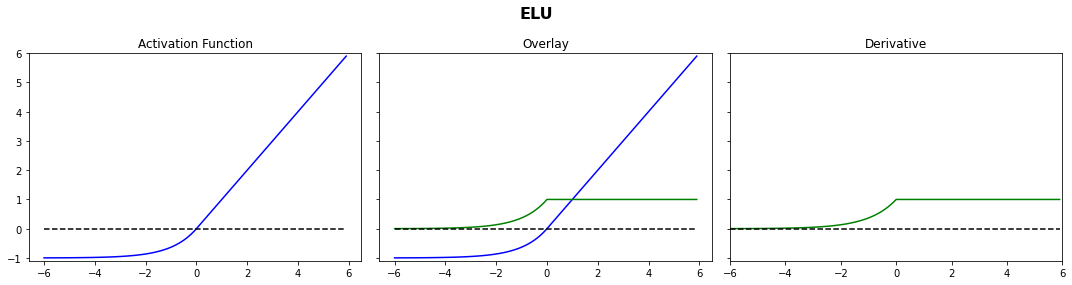

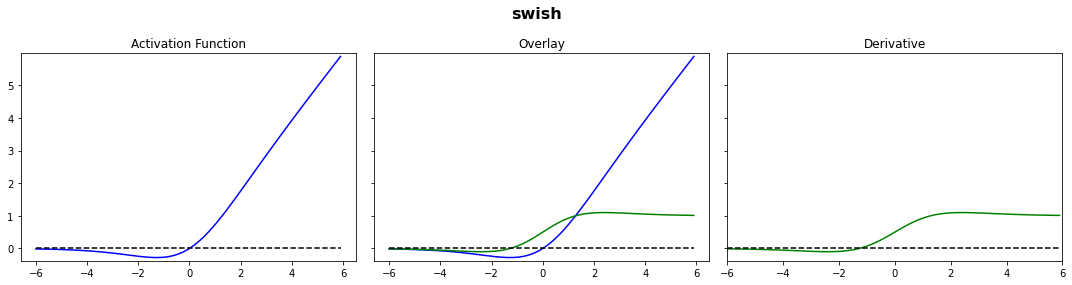

In [13]:
for activation in A.__all__:
    
    plot_activation(activation)

# Activating our Scalars

The last step to implementing activation functions is to allow our `Scalar` class to use them, which can be performed using this code.

In [14]:
# kaitorch/core.py

def activation(self, activation):

    import kaitorch.activations as A

    available = A.__all__

    if isinstance(activation, str) and activation in available:
        return getattr(A, activation)()(self)

    elif isinstance(activation, A.Activation):
        return activation(self)

    else:
        raise Exception(f'Activation {activation} not in {available}')
        
Scalar.activation = activation

__Just like Keras__, we want to be able get indicate our activation using either a `str` or `Activation` object.

```python
# Keras-esque
Dense(64, activation='relu')
Dense(64, activation=activations.relu)
```

So we use `isinstance()` to check the type
- If our input is a `str`, we check if the activation is in `activation.py` using `getattr()`
- If our input is an `Activation` object, we can directly use it

With this, `Scalar` now has an activation method, which when called, will apply the specified non-linearity to the value.

**Quick Note on "module.\_\_all\_\_"**

If you don't know what the `__all__` attribute does, it defines what's imported when you do something like `from [module] import *` if implemented. It's also useful for telling the user what classes/functions they are intended to use.

In [15]:
A.__all__

['sigmoid', 'tanh', 'ReLU', 'LeakyReLU', 'ELU', 'swish']

Of course, nothing is stopping you from access other classes/functions in the module, you just need to specify the name when importing like so

In [16]:
from kaitorch.activations import softmax

__Up Next: Building a Multi-layer Perceptron__ $\Rightarrow$